# Pymaceuticals Inc.
---

### Analysis

-  Mice gender does not seem to impact the results of the study (see pie charts).


-  The effectiveness of Capomulin is approximately comparable to Ramicane, but significantly more effective than Infubinol and Ceftamine (based on the box plots of final tumor volumes).


-  For Capomulin, after an initial spike in tumor volume, there are significant reductions in proceeding timepoints (based on line graph for Capomulin treatment).


-  Mouse weight and tumor volume have a strong linear relationship; the greater the weight of the mouse, the larger the tumor (see the correlation and linear regression chart).
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
from scipy.stats import sem
import numpy as np

# Study data files
study_results_path = "data/Study_results.csv"
mouse_metadata_path = "data/Mouse_metadata.csv"

# Read the mouse data and the study results
study_results = pd.read_csv(study_results_path)
mouse_metadata = pd.read_csv(mouse_metadata_path)

# Combine the data into a single dataset
complete_data_df = pd.merge(study_results, mouse_metadata, how="outer", on="Mouse ID")

# Display the data table for preview
complete_data_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [2]:
# Checking the number of mice.
unique_mice_ID=complete_data_df["Mouse ID"].unique()
number_of_mice=len(unique_mice_ID)
number_of_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice=complete_data_df.loc[complete_data_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mouse_data=complete_data_df.loc[complete_data_df["Mouse ID"] == "g989"]
dup_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# clean_complete_data = complete_data_df[complete_data_df['Mouse ID'].isin(dup_mouse_data)==False]
# clean_complete_data

clean_complete_data_df = complete_data_df[complete_data_df['Mouse ID'].isin(duplicate_mice)==False]
clean_complete_data_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [6]:
# Checking the number of mice in the clean DataFrame.
unique_mice_ID=clean_complete_data_df["Mouse ID"].unique()
number_of_mice=len(clean_complete_data_df["Mouse ID"].unique())
number_of_mice

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 


# Group data by Drug Regimen
summary_df = complete_data_df.groupby('Drug Regimen')

# Calculate the mean, median, standard deviation, and sem for each drug
tumor_mean = summary_df['Tumor Volume (mm3)'].mean()
tumor_median = summary_df['Tumor Volume (mm3)'].median()
tumor_variance = summary_df['Tumor Volume (mm3)'].var()
tumor_stdev = summary_df['Tumor Volume (mm3)'].std()
tumor_sem = summary_df['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.
summary_grouped_df = pd.DataFrame({'Mean Tumor Volume': tumor_mean, 'Median Tumor Volume': tumor_median,
                                   'Tumor Volume Variance': tumor_variance, 'Tumor Volume Std. Dev.': tumor_stdev,
                                   'Tumor Volume Std. Err.': tumor_sem})

summary_grouped_df



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0.5, 1.0, 'Total # of Timepoints for All Mice Tested for Each Drug Regimen')

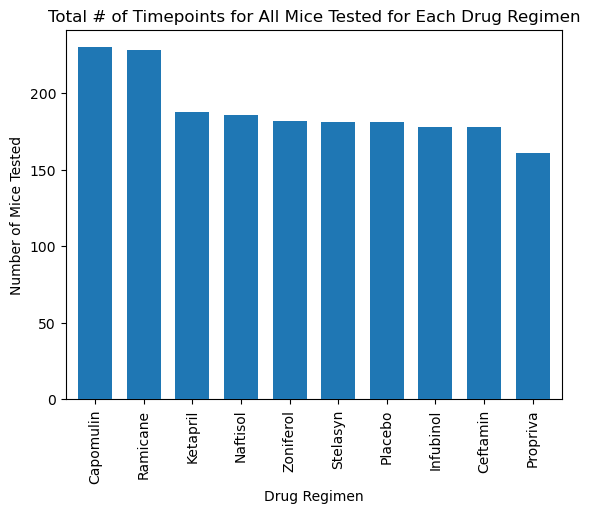

In [8]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

bar_plot=complete_data_df["Drug Regimen"].value_counts().plot.bar(width=0.7, zorder=3)
bar_plot.set_xlabel("Drug Regimen")
bar_plot.set_ylabel("Number of Mice Tested")
bar_plot.set_title("Total # of Timepoints for All Mice Tested for Each Drug Regimen")


Text(0.5, 1.0, 'Total # of Timepoints for All Mice Tested for Each Drug Regimen')

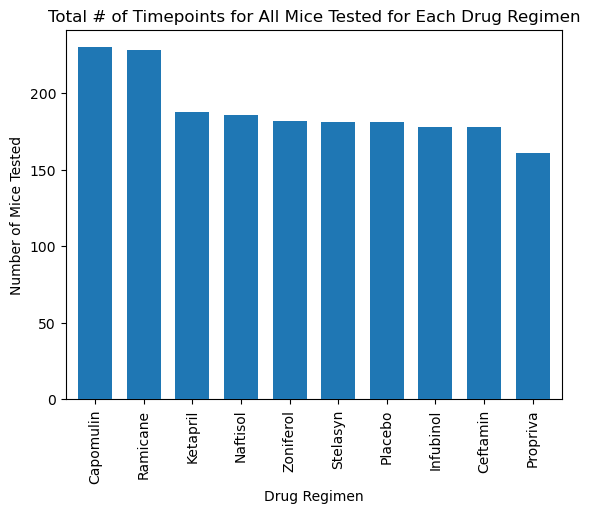

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.bar=complete_data_df["Drug Regimen"].value_counts().plot.bar(width=0.7, zorder=3)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.title("Total # of Timepoints for All Mice Tested for Each Drug Regimen")

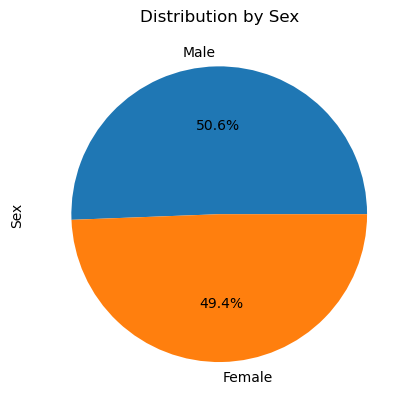

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Identify distribution of data by sex
data = complete_data_df['Sex'].value_counts()

# Plot a pie chart filled with corresponding percentages and displayed horizontally
pie_plot = data.plot.pie(autopct="%1.1f%%", startangle=0, title='Distribution by Sex')

Text(0.5, 1.0, 'Distribution by Sex')

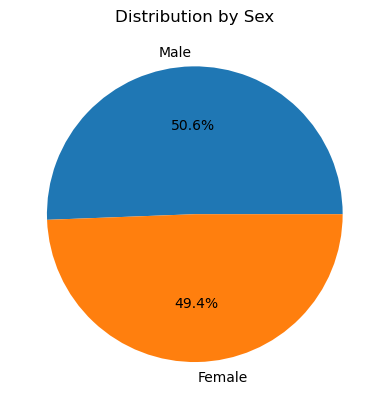

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Identify distribution of data by sex
data = complete_data_df['Sex'].value_counts()

# Plot a pie chart filled with corresponding percentages and displayed horizontally
plt.pie(data, labels=data.index.values, autopct="%1.1f%%", startangle=0)
plt.title("Distribution by Sex")

## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
   # Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint_df = pd.DataFrame(clean_complete_data_df.groupby('Mouse ID')['Timepoint'].max().sort_values()).reset_index().rename(columns={'Timepoint': 'max_timepoint'})
greatest_timepoint_df

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(clean_complete_data_df, greatest_timepoint_df, on='Mouse ID')
merged_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),max_timepoint
0,b128,0,45.000000,0,Capomulin,Female,9,22,45
1,b128,5,45.651331,0,Capomulin,Female,9,22,45
2,b128,10,43.270852,0,Capomulin,Female,9,22,45
3,b128,15,43.784893,0,Capomulin,Female,9,22,45
4,b128,20,42.731552,0,Capomulin,Female,9,22,45
...,...,...,...,...,...,...,...,...,...
1875,m601,25,33.118756,1,Capomulin,Male,22,17,45
1876,m601,30,31.758275,1,Capomulin,Male,22,17,45
1877,m601,35,30.834357,1,Capomulin,Male,22,17,45
1878,m601,40,31.378045,1,Capomulin,Male,22,17,45


In [13]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens: 
   # Capomulin, Ramicane, Infubinol, and Ceftamin. 

# Calculate the quartiles and IQR, and determine if there are any potential outliers across all four treatment regimens. 
   # Use the following substeps:
      # Create a list that holds the treatment names as well as a second, empty list to hold the tumor volume data.
      # Loop through each drug in the treatment list, locating the rows in the merged DataFrame that correspond to each treatment. 
      # Append the resulting final tumor volumes for each drug to the empty list.
      # Determine outliers by using the upper and lower bounds, and then print the results.

drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
drug_values = []

for drug in drugs:
    
    temp_df = merged_df.loc[merged_df['Drug Regimen'] == drug]

    # Subset
    final_volume_df = temp_df.loc[temp_df['Timepoint'] == temp_df['max_timepoint']]
    
    # Append
    values = final_volume_df['Tumor Volume (mm3)']
    drug_values.append(values)
    
    # IQR
    quartiles = values.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f'IQR for {drug}: {iqr}')
    
    # Bounds 
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f'Lower Bound for {drug}: {lower_bound}')
    print(f'Upper Bound for {drug}: {upper_bound}')
    
    # Outliers
    outliers_count = (values.loc[(final_volume_df['Tumor Volume (mm3)'] >= upper_bound) | 
                                        (final_volume_df['Tumor Volume (mm3)'] <= lower_bound)]).count()
    print(f'Number of {drug} outliers: {outliers_count}')

IQR for Capomulin: 7.781863460000004
Lower Bound for Capomulin: 20.70456164999999
Upper Bound for Capomulin: 51.83201549
Number of Capomulin outliers: 0
IQR for Ramicane: 9.098536719999998
Lower Bound for Ramicane: 17.912664470000003
Upper Bound for Ramicane: 54.30681135
Number of Ramicane outliers: 0
IQR for Infubinol: 11.477135160000003
Lower Bound for Infubinol: 36.83290494999999
Upper Bound for Infubinol: 82.74144559000001
Number of Infubinol outliers: 1
IQR for Ceftamin: 15.577752179999997
Lower Bound for Ceftamin: 25.355449580000002
Upper Bound for Ceftamin: 87.66645829999999
Number of Ceftamin outliers: 0


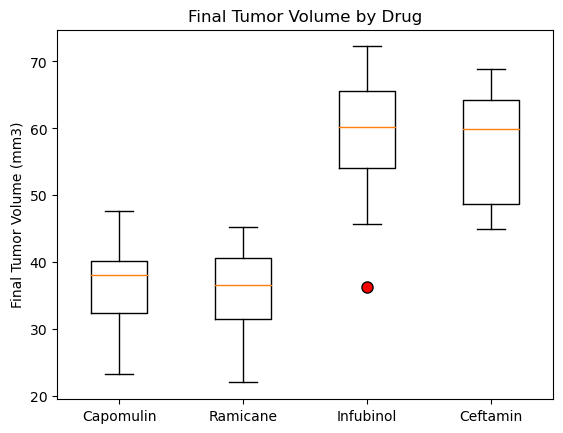

In [14]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# Edit outliers by changing color and style
flierprops = dict(marker='o', markerfacecolor='r', markersize=8, markeredgecolor='black')

plt.boxplot(drug_values, flierprops=flierprops)
plt.title('Final Tumor Volume by Drug')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
plt.show()

## Line and Scatter Plots

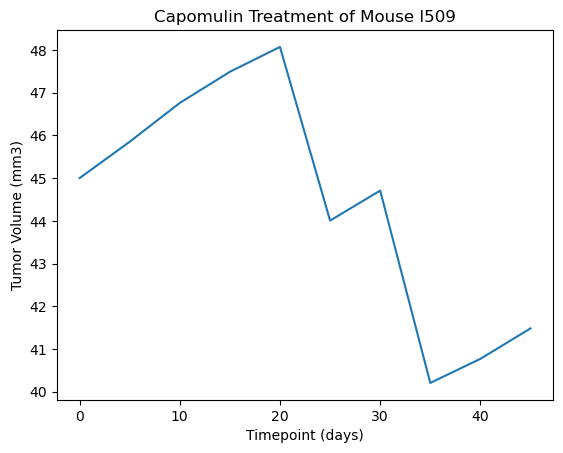

In [15]:
# Select mouse treated with Capomulin and generate a line plot of tumor volume vs. time point 

mouse = complete_data_df.loc[complete_data_df['Mouse ID'] == 'l509']
plt.plot(mouse["Timepoint"], mouse["Tumor Volume (mm3)"])
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse l509")
plt.show()

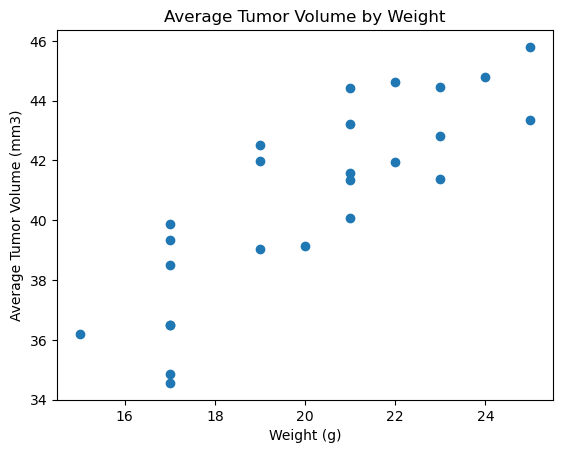

In [16]:
# Generate a scatter plot of average tumor volume vs. mouse weight for Capomulin

# Subset Capomulin only
capomulin_df = complete_data_df.loc[complete_data_df['Drug Regimen'] == 'Capomulin']

# Find average tumor volume for each mouse
avg_vol_df = pd.DataFrame(capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'avg_tumor_vol'})

# Merge and remove dups
avg_vol_df = pd.merge(capomulin_df, avg_vol_df, on='Mouse ID')
final_avg_vol_df = avg_vol_df[['Weight (g)', 'avg_tumor_vol']].drop_duplicates()
final_avg_vol_df

x = final_avg_vol_df['Weight (g)']
y = final_avg_vol_df['avg_tumor_vol']

plt.scatter(x, y)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')
plt.show()


## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.84.


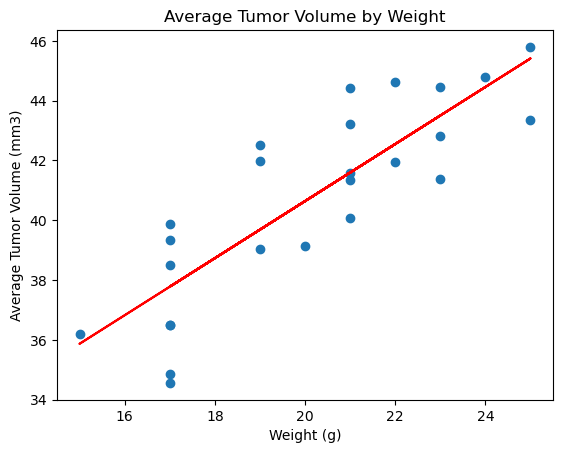

In [17]:
# Calculate correlation coefficient and linear regression for mouse weight and average tumor volume for the Capomulin regimen
# Plot the linear regression model on top of the previous scatter plot

# Code for previous scatter plot
capomulin_df = complete_data_df.loc[complete_data_df['Drug Regimen'] == 'Capomulin']
avg_vol_df = pd.DataFrame(capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'avg_tumor_vol'})
avg_vol_df = pd.merge(capomulin_df, avg_vol_df, on='Mouse ID')
final_avg_vol_df = avg_vol_df[['Weight (g)', 'avg_tumor_vol']].drop_duplicates()
final_avg_vol_df
x = final_avg_vol_df['Weight (g)']
y = final_avg_vol_df['avg_tumor_vol']

# Correlation coefficient
correlation = st.pearsonr(x,y)
print(f"The correlation between mouse weight and average tumor volume is {round(correlation[0],2)}.")

# Linear regression
(slope, intercept, r, p, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")

# Add labels and title 
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')
plt.show()